# Directed chain embedding in math

In [8]:
# Setup the environment

import nengo
import nengo.spa as spa
from nengo.spa import Vocabulary
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# Construct the embedding using HRRs

rng = np.random.RandomState(10)
dim = 32

vocab = Vocabulary(dimensions=dim, rng=rng, max_similarity=0.02, unitary=True)
incr = vocab.parse("INCREMENT")

zero = vocab.parse("ZERO")
vocab.add("ONE", vocab.parse("ZERO*INCREMENT"))
vocab.add("TWO", vocab.parse("ONE*INCREMENT"))
vocab.add("THREE", vocab.parse("TWO*INCREMENT"))
vocab.add("FOUR", vocab.parse("THREE*INCREMENT"))
vocab.add("FIVE", vocab.parse("FOUR*INCREMENT"))
vocab.add("SIX", vocab.parse("FIVE*INCREMENT"))
vocab.add("SEVEN", vocab.parse("SIX*INCREMENT"))
vocab.add("EIGHT", vocab.parse("SEVEN*INCREMENT"))
vocab.add("NINE", vocab.parse("EIGHT*INCREMENT"))
vocab.add("TEN", vocab.parse("NINE*INCREMENT"))
vocab.add("ELEVEN", vocab.parse("TEN*INCREMENT"))
vocab.add("TWELVE", vocab.parse("ELEVEN*INCREMENT"))


one = vocab.parse("ONE")
two = vocab.parse("TWO")
three = vocab.parse("THREE")
four = vocab.parse("FOUR")
five = vocab.parse("FIVE")
six = vocab.parse("SIX")
seven = vocab.parse("SEVEN")
eight = vocab.parse("EIGHT")
nine = vocab.parse("EIGHT*INCREMENT")
ten = vocab.parse("NINE*INCREMENT")

In [10]:
# Compute the transformation and convert it into a SP object
T = (~zero*one + ~one*two + ~two*three + ~three*four + ~four*five).v / 1 #5
T = spa.SemanticPointer(T)

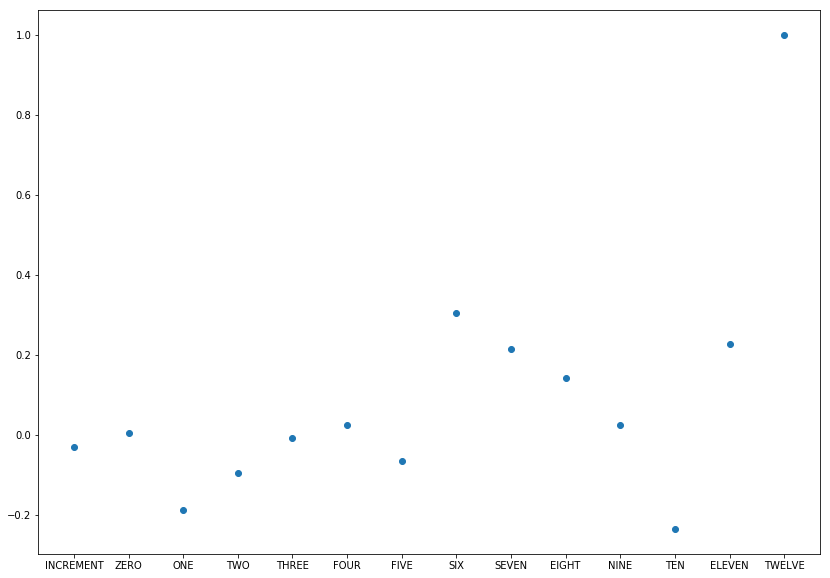

In [13]:
# Test the model using the computed transformation

test = (eight * T*T*T*T).v

similarity = []
for sp_name in vocab.keys:
    vec = vocab.parse(sp_name)
    similarity.append(vec.compare(test))
 

plt.figure(figsize = (14,10))    
plt.plot(vocab.keys, similarity, 'o', label=vocab.keys)   

The vector representing Successor4 of eight is most similar to twelve. 